In [1]:
# Instala o pacote googledrive
install.packages(c("googledrive", "tidyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('ggpmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘xts’, ‘zoo’, ‘SparseM’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘Rcpp’, ‘ggpp’, ‘confintr’, ‘polynom’, ‘quantreg’, ‘lmodel2’, ‘splus2R’, ‘multcomp’, ‘multcompView’, ‘plyr’




In [3]:
# Carrega os pacotes "ggplot2" e "dplyr"
library(googledrive)
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom



In [4]:
# Retorna a pasta atual de trabalho do Colab
getwd()

[1] "/content"

In [5]:
# Baixa o arquivo do Google Drive a partir da url compartilhada
url <- "https://drive.google.com/file/d/10ek6eNcdDyW7oeCfN1wJwCwEKIsjtAwe/view?usp=drive_link"
dst <- "/content/dataset/api.csv"
# Extracao ID
# id <- strsplit(url, split="/")

# id <- id[[1]][6]
# id

In [6]:
# Baixa o arquivo
# drive_deauth()
# drive_user()
# public_file <- drive_get(as_id(id))
# dir.create(dirname(dst))
# drive_download(public_file, path=dst, overwrite = TRUE)

In [7]:
# Função para baixar arquivos do Google Drive
down_gdrive <- function(url, dst){

    # Quebra o caractere pela barra "/", resultando numa lista de caracteres
    id <- strsplit(url, split = "/")
    # Acessa o primeiro elemento da lista e posteriormente o sexto elemento.
    id <- id[[1]][6]

    # Carrega o arquivo de acordo com o id convertido de caracteres.
    public_file <- drive_get(as_id(id))

    # Cria a pasta se não existir
    if (!file.exists(dirname(dst))) {
      dir.create(dirname(dst), recursive = TRUE)
    }

    # Download do arquivo
    tryCatch({
      drive_download(public_file, path = dst, overwrite = TRUE)
    }, error = function(e) {
      cat("Download failed:", conditionMessage(e), "\n")
    })
}

In [8]:
# Baixa o arquivo do Google Drive a partir da url compartilhada
down_gdrive(url, dst)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e6544985bb44ed34712662f8fa3168ad&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIRGxjY2tXVHdaMGFUZm5TSGN2ODFhYS1VbEstTzZjdXlzLW54V01xd0J3eDRzOTV3Wk9NOUxQZGE0ZHE0eWdWUSIsInN0YXRlIjoiZTY1NDQ5ODViYjQ0ZWQzNDcxMjY2MmY4ZmEzMTY4YWQifQ==


File downloaded:

• api.csv <id: 10ek6eNcdDyW7oeCfN1wJwCwEKIsjtAwe>

Saved locally as:

• /content/dataset/api.csv



In [9]:
df_api <- read.csv(file = dst, sep = ";", colClasses = "character")
head(df_api, 3)

,id,tipo,nome,nomec,num,dst_nm,dst_num,cdd_nm,cdd_num,flag,⋯,edu_supi,edu_sup,edu_medi,edu_med,edu_pos,edu,prof_qlt,prof_qle,inscritos,test_num
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,01611190130229,Superior,Alameda High,Alameda High,1,Alameda City Unified,6,Alameda,1,NA,⋯,6,16,22,38,18,"3,45000004768372",85,16,1278,1090
2,01611190132878,Superior,Encinal High,Encinal High,2,Alameda City Unified,6,Alameda,1,NA,⋯,11,20,29,31,9,"3,05999994277954",90,10,1113,840
3,01611196000004,Medio,Chipman Middle,Chipman Middle,3,Alameda City Unified,6,Alameda,1,NA,⋯,11,31,30,20,8,"2,8199999332428",80,12,546,472


In [10]:
str(df_api)

'data.frame':	6194 obs. of  37 variables:
 $ id       : chr  "01611190130229" "01611190132878" "01611196000004" "01611196090005" ...
 $ tipo     : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ nome     : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.)" ...
 $ nomec    : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.) Elementary" ...
 $ num      : chr  "1" "2" "3" "4" ...
 $ dst_nm   : chr  "Alameda City Unified" "Alameda City Unified" "Alameda City Unified" "Alameda City Unified" ...
 $ dst_num  : chr  "6" "6" "6" "6" ...
 $ cdd_nm   : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ cdd_num  : chr  "1" "1" "1" "1" ...
 $ flag     : chr  NA NA NA NA ...
 $ test_pct : chr  "96" "99" "99" "99" ...
 $ api00    : chr  "731" "622" "622" "774" ...
 $ api99    : chr  "693" "589" "572" "732" ...
 $ meta     : chr  "5" "11" "11" "3" ...
 $ meta_dif : chr  "38" "33" "50" "42" ...
 $ meta_r1  : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ meta_r2  : c

In [11]:
# Colunas selecionadas para o estudo
cols <- c(
    "id","tipo","nome","cdd_nm","api00","api99","meta","refs",
    "npi","edu_resp","edu_supi","edu_sup","edu_medi","edu_med",
    "edu_pos","prof_qle","inscritos","nov","edu")
cols

[1] "id"        "tipo"      "nome"      "cdd_nm"    "api00"     "api99"    
 [7] "meta"      "refs"      "npi"       "edu_resp"  "edu_supi"  "edu_sup"  
[13] "edu_medi"  "edu_med"   "edu_pos"   "prof_qle"  "inscritos" "nov"      
[19] "edu"

In [12]:
df <- df_api[cols]
str(df)

'data.frame':	6194 obs. of  19 variables:
 $ id       : chr  "01611190130229" "01611190132878" "01611196000004" "01611196090005" ...
 $ tipo     : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ nome     : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.)" ...
 $ cdd_nm   : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ api00    : chr  "731" "622" "622" "774" ...
 $ api99    : chr  "693" "589" "572" "732" ...
 $ meta     : chr  "5" "11" "11" "3" ...
 $ refs     : chr  "14" "20" "55" "35" ...
 $ npi      : chr  "16" "18" "25" "26" ...
 $ edu_resp : chr  "91" "84" "86" "96" ...
 $ edu_supi : chr  "6" "11" "11" "3" ...
 $ edu_sup  : chr  "16" "20" "31" "22" ...
 $ edu_medi : chr  "22" "29" "30" "29" ...
 $ edu_med  : chr  "38" "31" "20" "31" ...
 $ edu_pos  : chr  "18" "9" "8" "15" ...
 $ prof_qle : chr  "16" "10" "12" "4" ...
 $ inscritos: chr  "1278" "1113" "546" "330" ...
 $ nov      : chr  "9" "13" "20" "21" ...
 $ edu      : chr  "3,45000004768372" "3,

In [13]:
# Colunas numericas
cols_num <- cols[5:14]

# Estrutura de repetiçõ (laço ou "loop")
# Efetua a iteração conforme o vetor de entrada
for (col in cols_num) {
    # print(col)
    df[,col] <- as.numeric(df[,col])
}

In [14]:
df$edu <- gsub(",", ".", df$edu)
df$edu <- as.double(df$edu)

In [15]:
str(df)

'data.frame':	6194 obs. of  19 variables:
 $ id       : chr  "01611190130229" "01611190132878" "01611196000004" "01611196090005" ...
 $ tipo     : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ nome     : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.)" ...
 $ cdd_nm   : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ api00    : num  731 622 622 774 811 780 808 739 795 650 ...
 $ api99    : num  693 589 572 732 784 725 765 667 792 580 ...
 $ meta     : num  5 11 11 3 1 4 2 7 1 11 ...
 $ refs     : num  14 20 55 35 15 25 22 50 10 71 ...
 $ npi      : num  16 18 25 26 9 18 9 35 10 41 ...
 $ edu_resp : num  91 84 86 96 96 87 90 82 92 91 ...
 $ edu_supi : num  6 11 11 3 3 6 4 11 2 16 ...
 $ edu_sup  : num  16 20 31 22 9 11 27 35 12 30 ...
 $ edu_medi : num  22 29 30 29 29 28 25 27 24 31 ...
 $ edu_med  : num  38 31 20 31 26 41 32 21 34 20 ...
 $ edu_pos  : chr  "18" "9" "8" "15" ...
 $ prof_qle : chr  "16" "10" "12" "4" ...
 $ inscritos: chr  "1278" "1113"

In [16]:
head(df)

,id,tipo,nome,cdd_nm,api00,api99,meta,refs,npi,edu_resp,edu_supi,edu_sup,edu_medi,edu_med,edu_pos,prof_qle,inscritos,nov,edu
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,01611190130229,Superior,Alameda High,Alameda,731,693,5,14,16,91,6,16,22,38,18,16,1278,9,3.45
2,01611190132878,Superior,Encinal High,Alameda,622,589,11,20,18,84,11,20,29,31,9,10,1113,13,3.06
3,01611196000004,Medio,Chipman Middle,Alameda,622,572,11,55,25,86,11,31,30,20,8,12,546,20,2.82
4,01611196090005,Fundamental,Lum (Donald D.),Alameda,774,732,3,35,26,96,3,22,29,31,15,4,330,21,3.32
5,01611196090013,Fundamental,Edison Elementa,Alameda,811,784,1,15,9,96,3,9,29,26,33,5,233,11,3.76
6,01611196090021,Fundamental,Otis (Frank) El,Alameda,780,725,4,25,18,87,6,11,28,41,13,5,276,12,3.44


In [17]:
# Verificando nulos
is.na(df[1:5,])

,id,tipo,nome,cdd_nm,api00,api99,meta,refs,npi,edu_resp,edu_supi,edu_sup,edu_medi,edu_med,edu_pos,prof_qle,inscritos,nov,edu
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [18]:
# Somatório das colunas (FALSE = 0 / TRUE = 1)
tmp <- colSums(is.na(df))
print(tmp)

       id      tipo      nome    cdd_nm     api00     api99      meta      refs 
        0         0         0         0         0         0       740         0 
      npi  edu_resp  edu_supi   edu_sup  edu_medi   edu_med   edu_pos  prof_qle 
        0         0         0         0         0         0         0         2 
inscritos       nov       edu 
       37         4       178 


In [19]:
# Caixa Alta
colnames(df) <- toupper(colnames(df))
str(df)

'data.frame':	6194 obs. of  19 variables:
 $ ID       : chr  "01611190130229" "01611190132878" "01611196000004" "01611196090005" ...
 $ TIPO     : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ NOME     : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.)" ...
 $ CDD_NM   : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ API00    : num  731 622 622 774 811 780 808 739 795 650 ...
 $ API99    : num  693 589 572 732 784 725 765 667 792 580 ...
 $ META     : num  5 11 11 3 1 4 2 7 1 11 ...
 $ REFS     : num  14 20 55 35 15 25 22 50 10 71 ...
 $ NPI      : num  16 18 25 26 9 18 9 35 10 41 ...
 $ EDU_RESP : num  91 84 86 96 96 87 90 82 92 91 ...
 $ EDU_SUPI : num  6 11 11 3 3 6 4 11 2 16 ...
 $ EDU_SUP  : num  16 20 31 22 9 11 27 35 12 30 ...
 $ EDU_MEDI : num  22 29 30 29 29 28 25 27 24 31 ...
 $ EDU_MED  : num  38 31 20 31 26 41 32 21 34 20 ...
 $ EDU_POS  : chr  "18" "9" "8" "15" ...
 $ PROF_QLE : chr  "16" "10" "12" "4" ...
 $ INSCRITOS: chr  "1278" "1113"

In [20]:
# Coluna DIF API 2000 x 1999
df$DIF_API <- df$API00 - df$API99
str(df)

'data.frame':	6194 obs. of  20 variables:
 $ ID       : chr  "01611190130229" "01611190132878" "01611196000004" "01611196090005" ...
 $ TIPO     : chr  "Superior" "Superior" "Medio" "Fundamental" ...
 $ NOME     : chr  "Alameda High" "Encinal High" "Chipman Middle" "Lum (Donald D.)" ...
 $ CDD_NM   : chr  "Alameda" "Alameda" "Alameda" "Alameda" ...
 $ API00    : num  731 622 622 774 811 780 808 739 795 650 ...
 $ API99    : num  693 589 572 732 784 725 765 667 792 580 ...
 $ META     : num  5 11 11 3 1 4 2 7 1 11 ...
 $ REFS     : num  14 20 55 35 15 25 22 50 10 71 ...
 $ NPI      : num  16 18 25 26 9 18 9 35 10 41 ...
 $ EDU_RESP : num  91 84 86 96 96 87 90 82 92 91 ...
 $ EDU_SUPI : num  6 11 11 3 3 6 4 11 2 16 ...
 $ EDU_SUP  : num  16 20 31 22 9 11 27 35 12 30 ...
 $ EDU_MEDI : num  22 29 30 29 29 28 25 27 24 31 ...
 $ EDU_MED  : num  38 31 20 31 26 41 32 21 34 20 ...
 $ EDU_POS  : chr  "18" "9" "8" "15" ...
 $ PROF_QLE : chr  "16" "10" "12" "4" ...
 $ INSCRITOS: chr  "1278" "1113"

In [21]:
# Padrão para tamanho da plotagem
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res = 150)

`geom_smooth()` using formula = 'y ~ x'


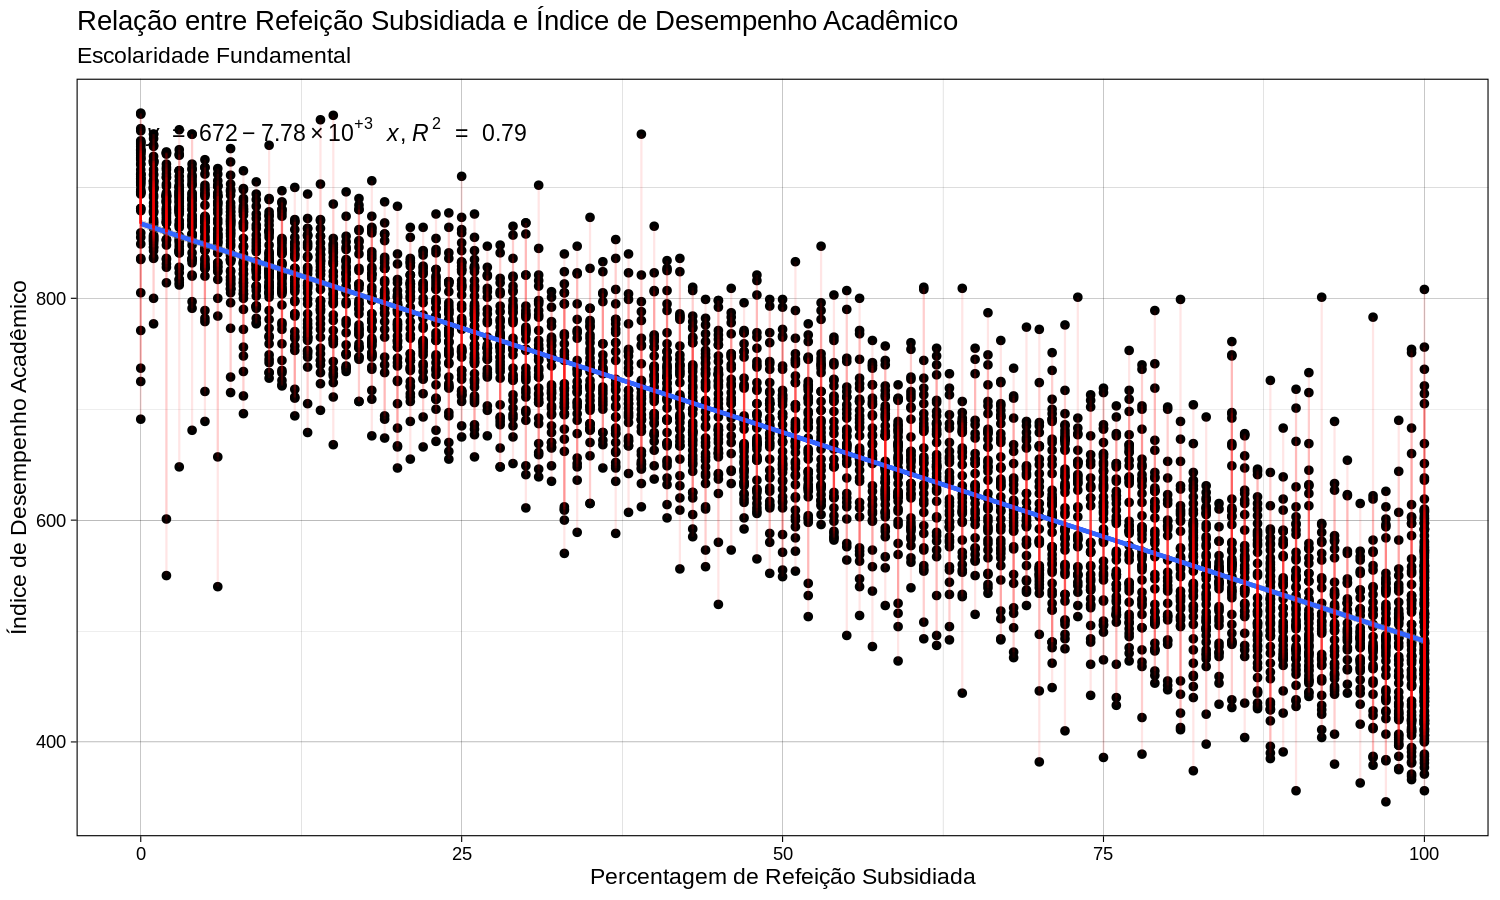

In [22]:
# Gráfico de Dispersão para tipo Fundamental
fm <- y ~ poly(x,1)
df %>%
  filter(TIPO == c("Fundamental")) %>%
  ggplot(aes(x = REFS, y = API00)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    stat_poly_line(formula = fm) +
    stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
    stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
    labs(title = "Relação entre Refeição Subsidiada e Índice de Desempenho Acadêmico",
        subtitle = "Escolaridade Fundamental",
        x = "Percentagem de Refeição Subsidiada",
        y = "Índice de Desempenho Acadêmico") +
    theme_linedraw()

`geom_smooth()` using formula = 'y ~ x'


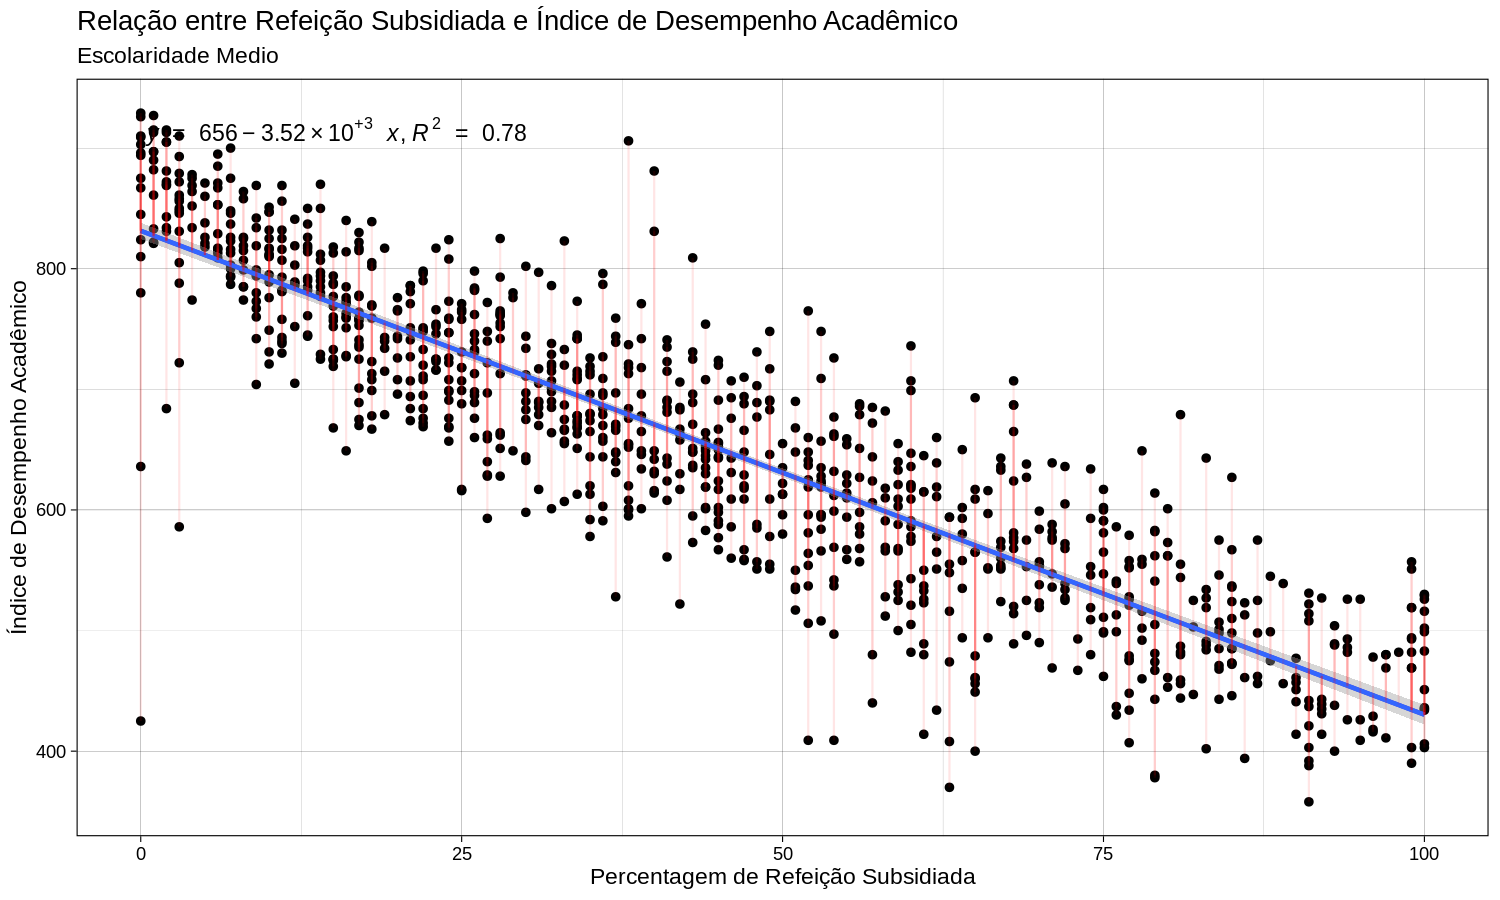

In [23]:
# Gráfico de Dispersão para tipo Medio
fm <- y ~ poly(x,1)
df %>%
  filter(TIPO == c("Medio")) %>%
  ggplot(aes(x = REFS, y = API00)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    stat_poly_line(formula = fm) +
    stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
    stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
    labs(title = "Relação entre Refeição Subsidiada e Índice de Desempenho Acadêmico",
        subtitle = "Escolaridade Medio",
        x = "Percentagem de Refeição Subsidiada",
        y = "Índice de Desempenho Acadêmico") +
    theme_linedraw()

`geom_smooth()` using formula = 'y ~ x'


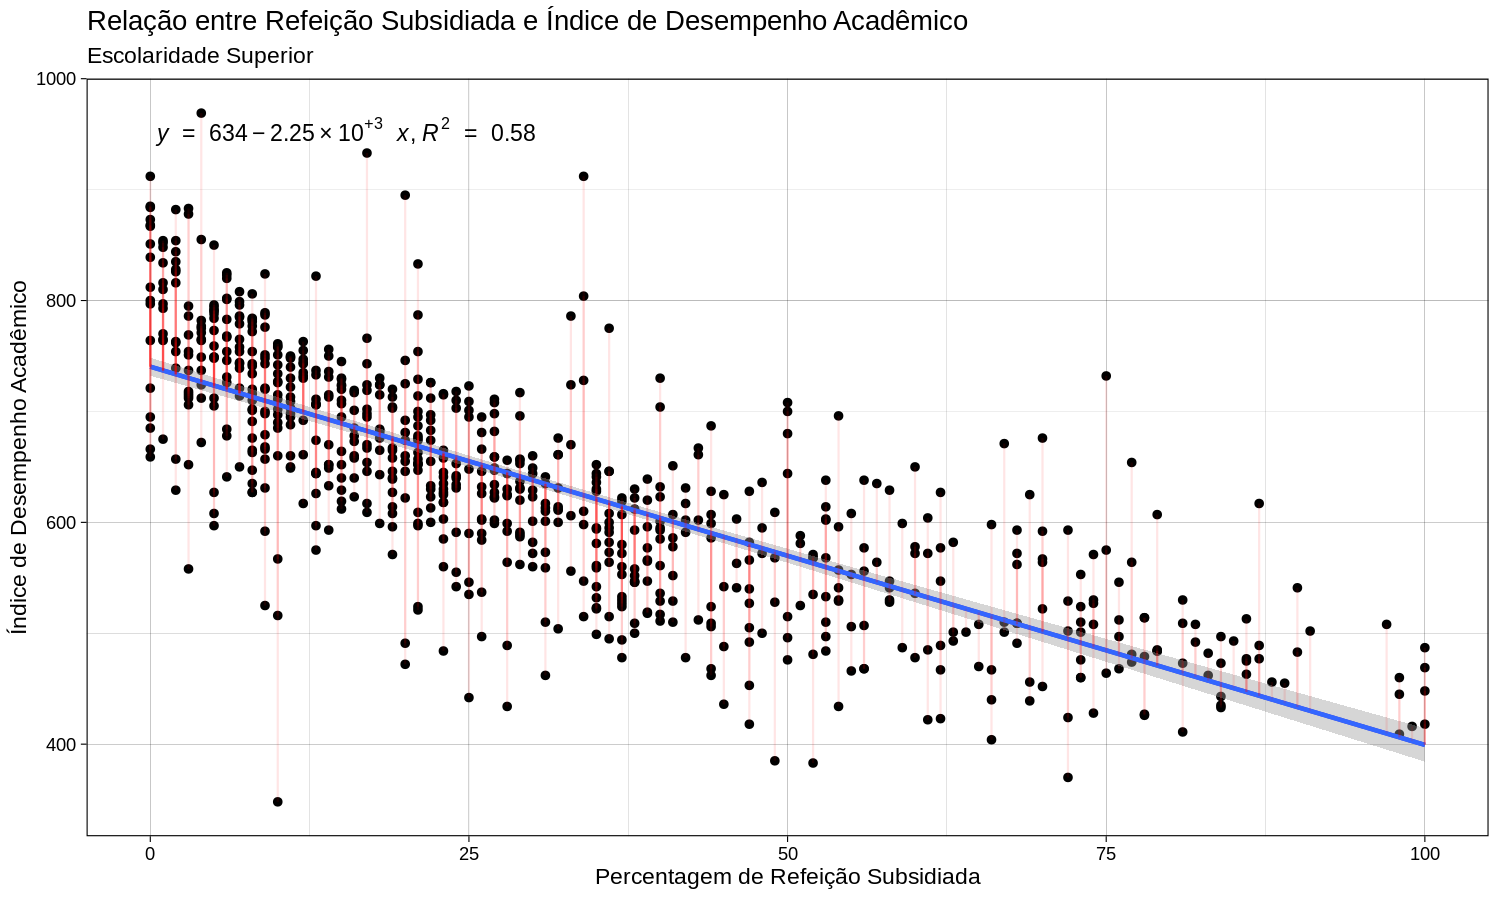

In [24]:
# Gráfico de Dispersão para tipo Fundamental
fm <- y ~ poly(x,1)
df %>%
  filter(TIPO == c("Superior")) %>%
  ggplot(aes(x = REFS, y = API00)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    stat_poly_line(formula = fm) +
    stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
    stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
    labs(title = "Relação entre Refeição Subsidiada e Índice de Desempenho Acadêmico",
        subtitle = "Escolaridade Superior",
        x = "Percentagem de Refeição Subsidiada",
        y = "Índice de Desempenho Acadêmico") +
    theme_linedraw()

`geom_smooth()` using formula = 'y ~ x'


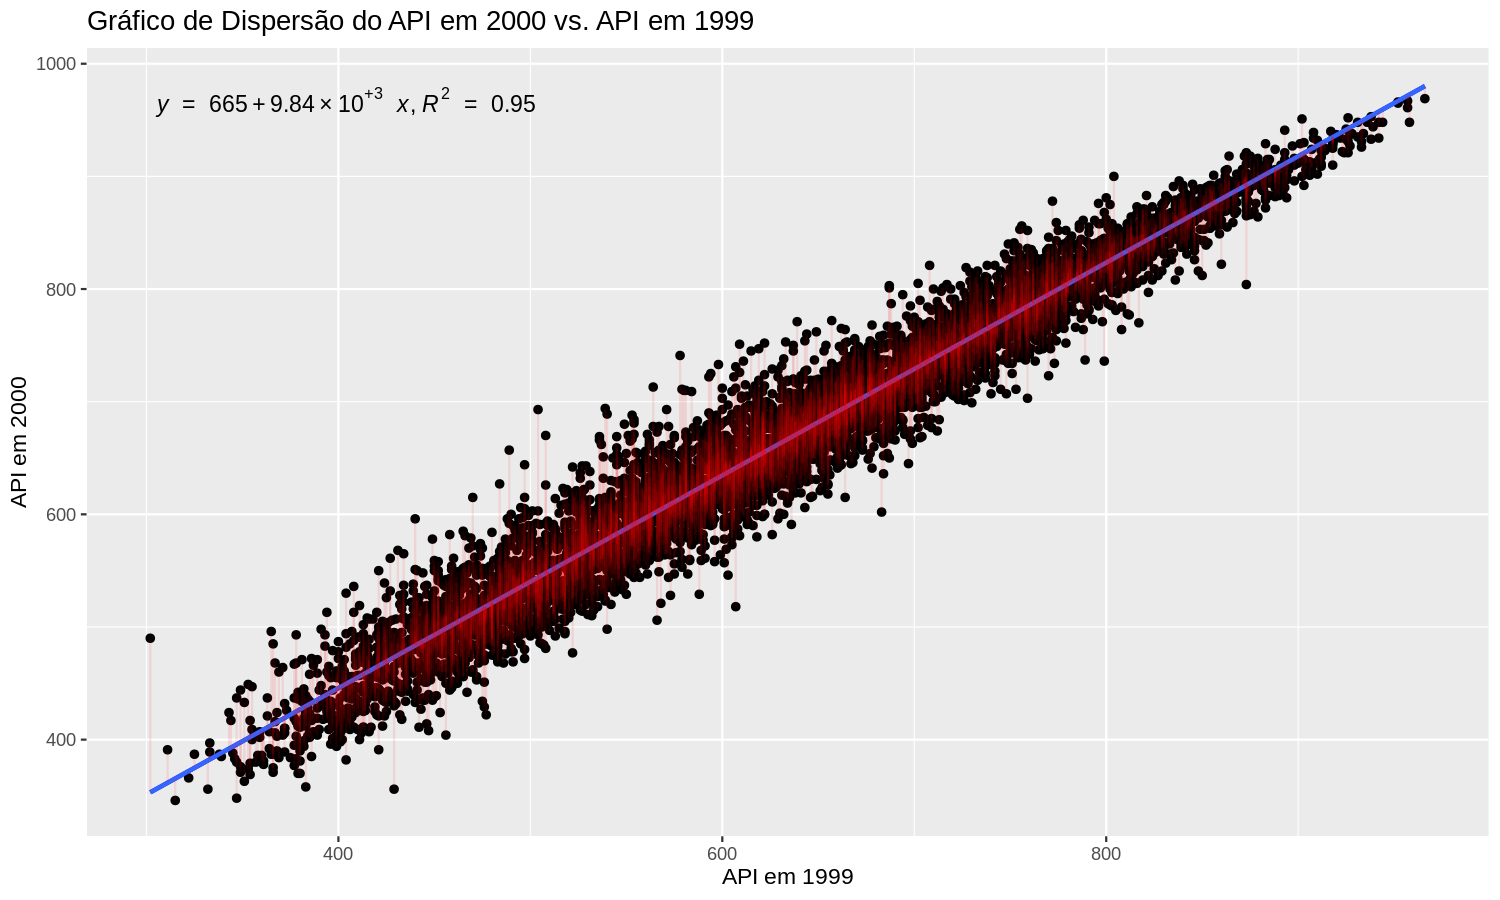

In [25]:
fm <- y ~ poly(x,1)
ggplot(df, aes(x = API99, y = API00)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  stat_poly_line(formula = fm) +
  stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
  stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
  labs(title = "Gráfico de Dispersão do API em 2000 vs. API em 1999",
       x = "API em 1999", y = "API em 2000")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 178 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 178 rows containing non-finite values (`stat_poly_line()`).”
Warning message:
“Removed 178 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 178 rows containing non-finite values (`stat_fit_deviations()`).”
Warning message:
“Removed 178 rows containing missing values (`geom_point()`).”


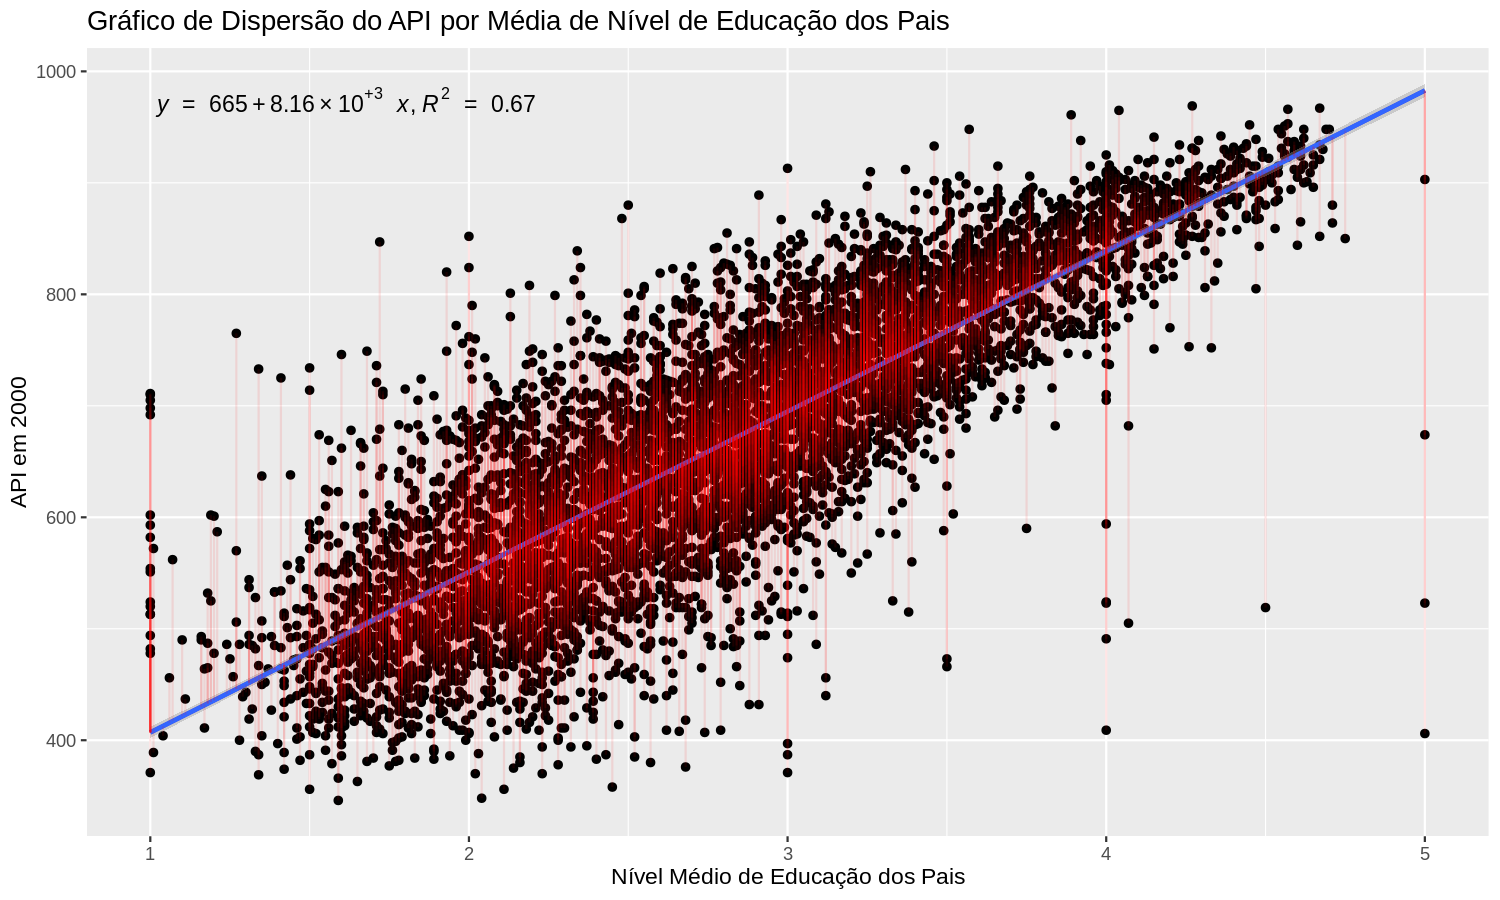

In [26]:
fm <- y ~ poly(x,1)
ggplot(data = df, aes(x = EDU, y = API00)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  stat_poly_line(formula = fm) +
  stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
  stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +

  labs(title = "Gráfico de Dispersão do API por Média de Nível de Educação dos Pais",
       x = "Nível Médio de Educação dos Pais", y = "API em 2000")

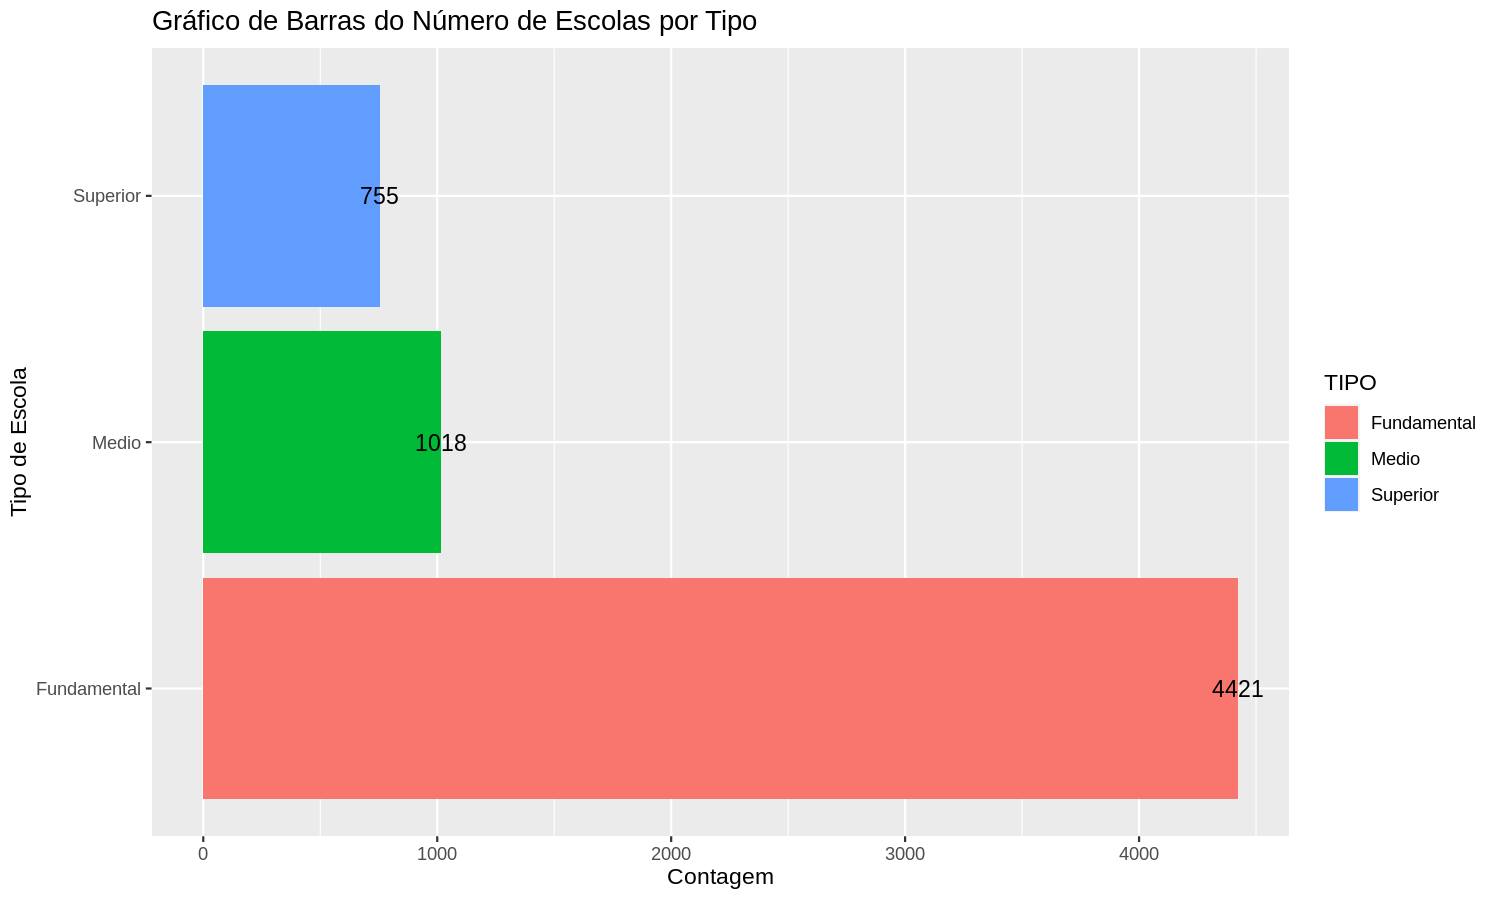

In [27]:
ggplot(df, aes(x = TIPO, fill = TIPO)) +
  geom_bar() +
  geom_text(
        stat = "count",
        aes(label = after_stat(count)),
        # hjust = -1,
        vjust = .5,
        position = "stack") +
  coord_flip() +
  labs(title = "Gráfico de Barras do Número de Escolas por Tipo",
       x = "Tipo de Escola", y = "Contagem")

Warning message:
“Removed 178 rows containing non-finite values (`stat_bin()`).”


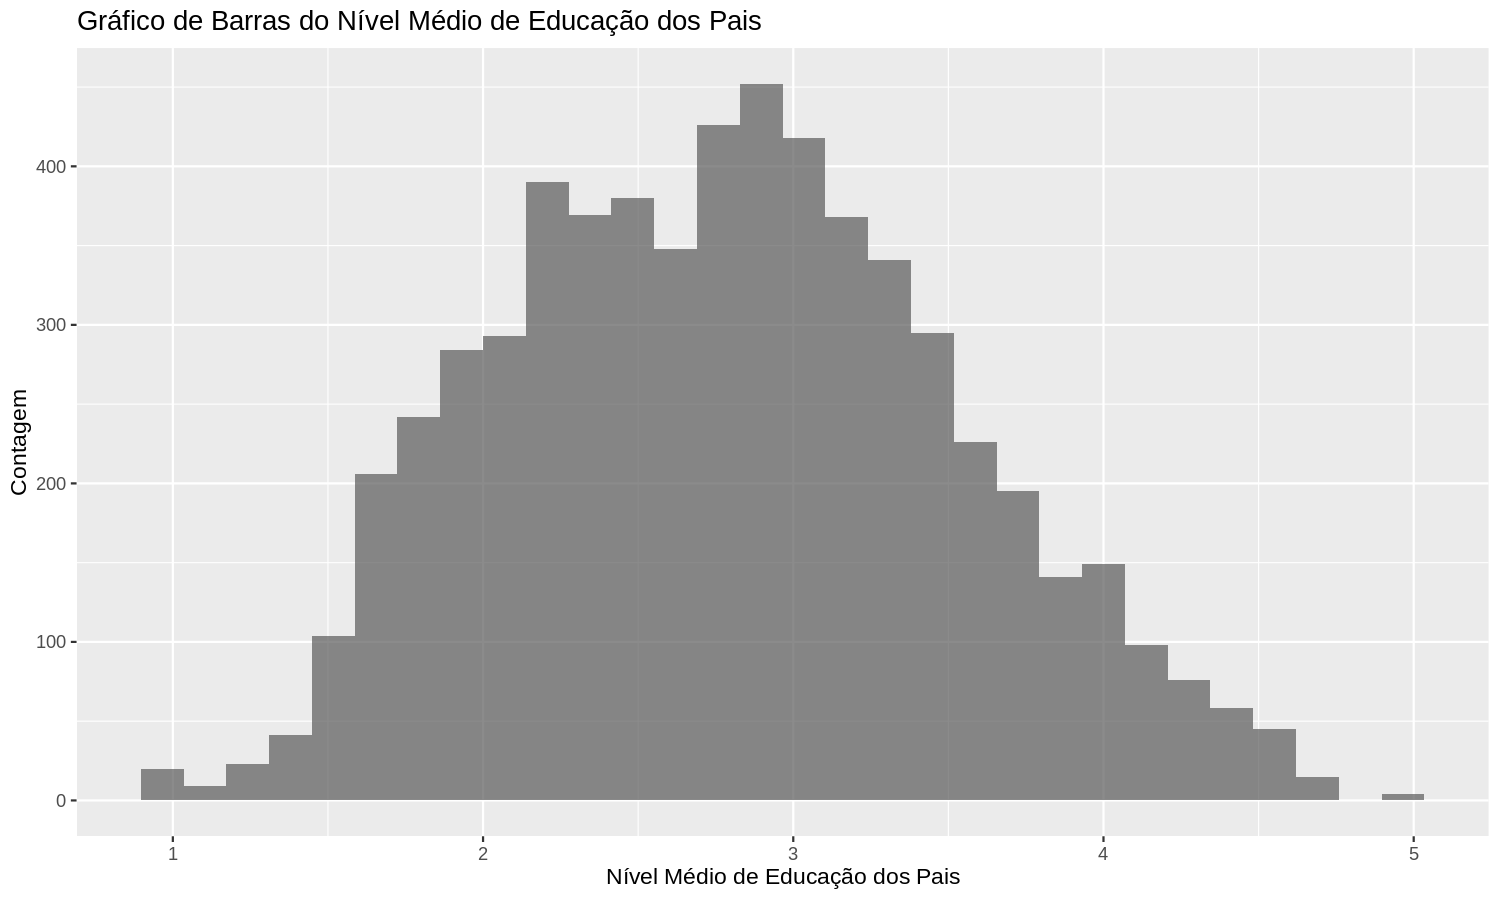

In [28]:
ggplot(df, aes(x = EDU)) +
  geom_histogram(bins = 30, alpha = 0.7) +
  labs(title = "Gráfico de Barras do Nível Médio de Educação dos Pais",
       x = "Nível Médio de Educação dos Pais", y = "Contagem")

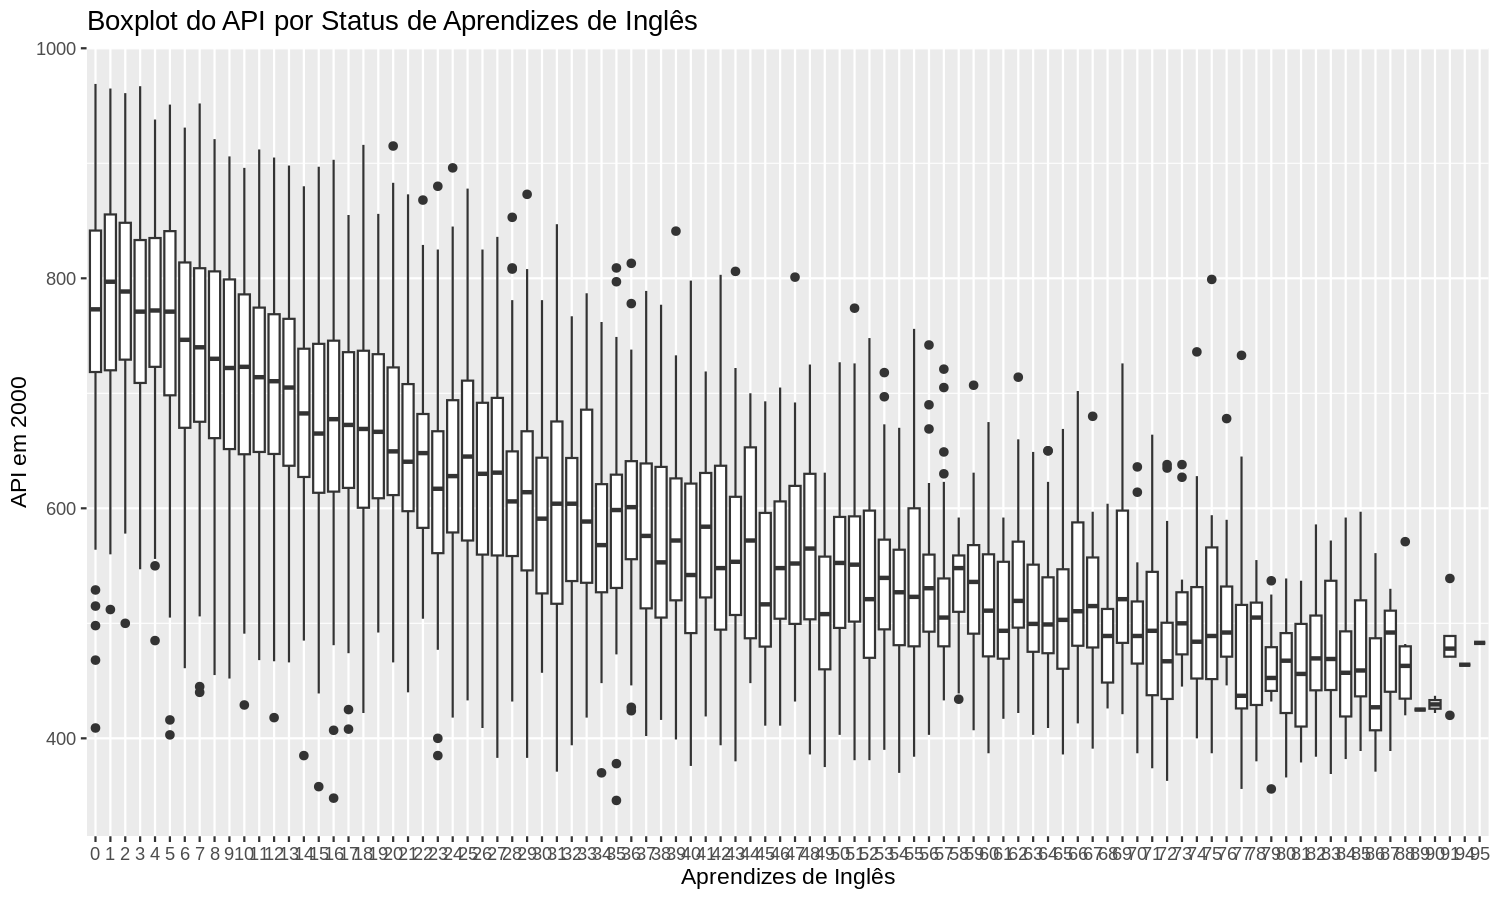

In [29]:
ggplot(df, aes(x = as.factor(NPI), y = API00)) +
  geom_boxplot() +
  labs(title = "Boxplot do API por Status de Aprendizes de Inglês",
       x = "Aprendizes de Inglês", y = "API em 2000")

`geom_smooth()` using formula = 'y ~ x'


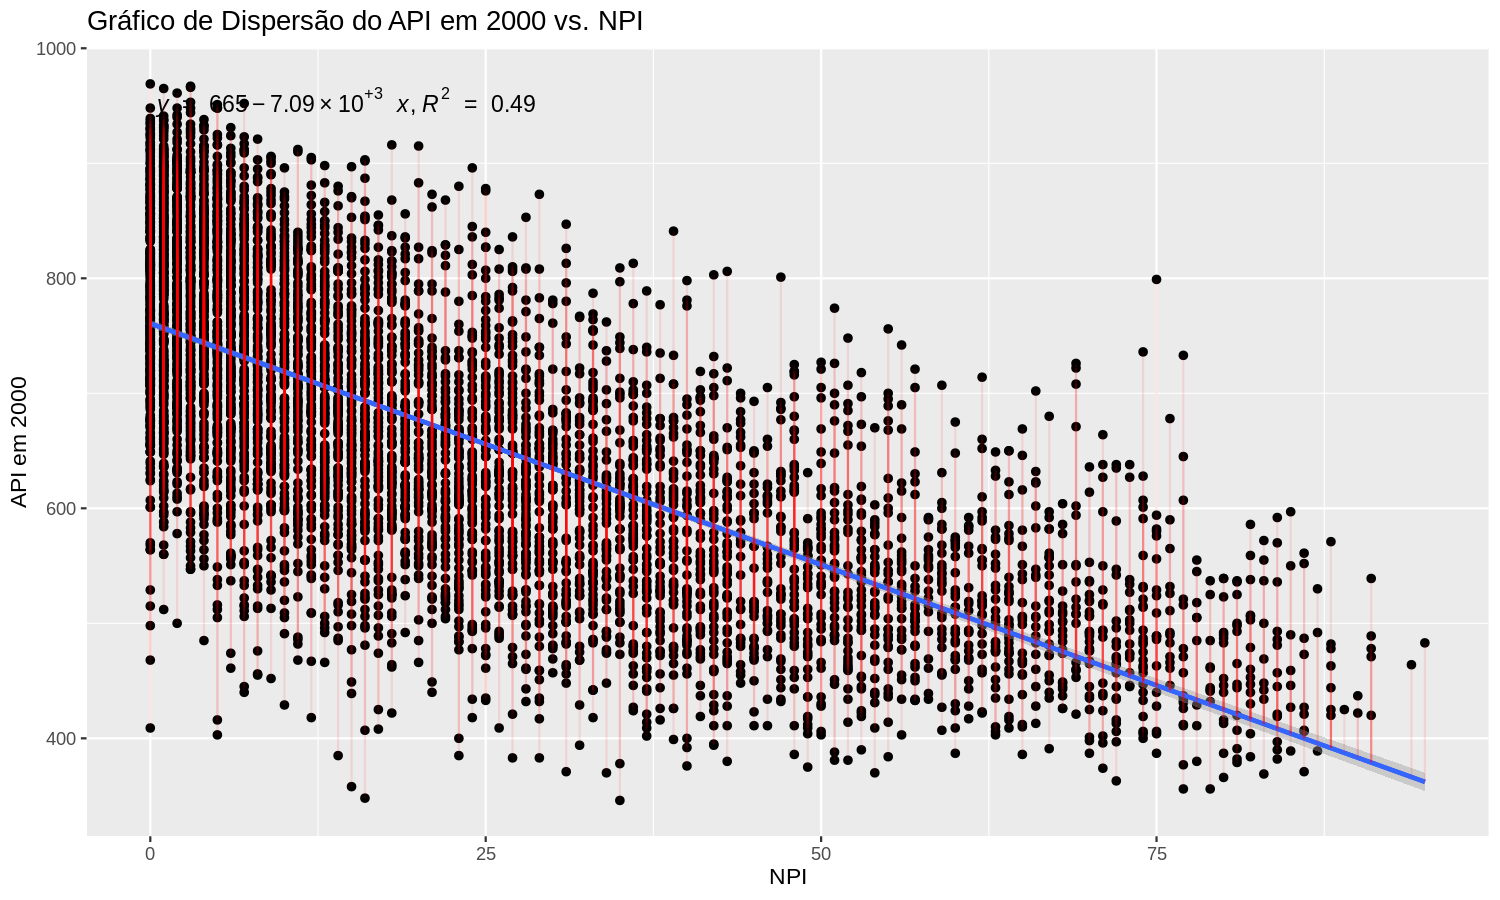

In [30]:
fm <- y ~ poly(x,1)
df %>%
  # filter(TIPO == c("Fundamental")) %>%
  ggplot(aes(x = NPI, y = API00)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    stat_poly_line(formula = fm) +
    stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
    stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
    labs(title = "Gráfico de Dispersão do API em 2000 vs. NPI",
        x = "NPI", y = "API em 2000")

In [31]:
var <- 'NPI'

In [32]:
sm <- summary(df[,var])
sm

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   16.00   22.87   35.00   95.00 

In [33]:
mean_var <- mean(df[,var], na.rm = T)
round(mean_var,2)

[1] 22.87

In [34]:
median(df[,var], na.rm = T)

[1] 16

In [35]:
qt <- quantile(df[,var], na.rm = T)
qt

0%  25%  50%  75% 100% 
   0    5   16   35   95

In [36]:
IQR_var <- IQR(df[,var], na.rm = T)
qt[[4]] + 1.5*IQR_var
qt[[2]] - 1.5*IQR_var

[1] 80

[1] -40

In [37]:
var <- "CDD_NM"
tb <- table(df[,var])
tb


        Alameda          Amador           Butte       Calaveras          Colusa 
            279              10              48              10               9 
   Contra Costa       Del Norte       El Dorado          Fresno           Glenn 
            179               8              40             186               9 
       Humboldt        Imperial            Inyo            Kern           Kings 
             40              40               7             180              25 
           Lake          Lassen     Los Angeles          Madera           Marin 
             22              11            1440              31              50 
       Mariposa       Mendocino          Merced           Modoc            Mono 
              5              25              63               5               3 
       Monterey            Napa          Nevada          Orange          Placer 
             83              27              14             418              66 
         Plumas       River

In [38]:
df <- df %>%
  group_by(CDD_NM) %>%
  mutate(COUNT_SCHOOLS = n())

In [39]:
mean_api_type <- df %>%
  group_by(TIPO) %>%
  summarize(mean_api = mean(API00))

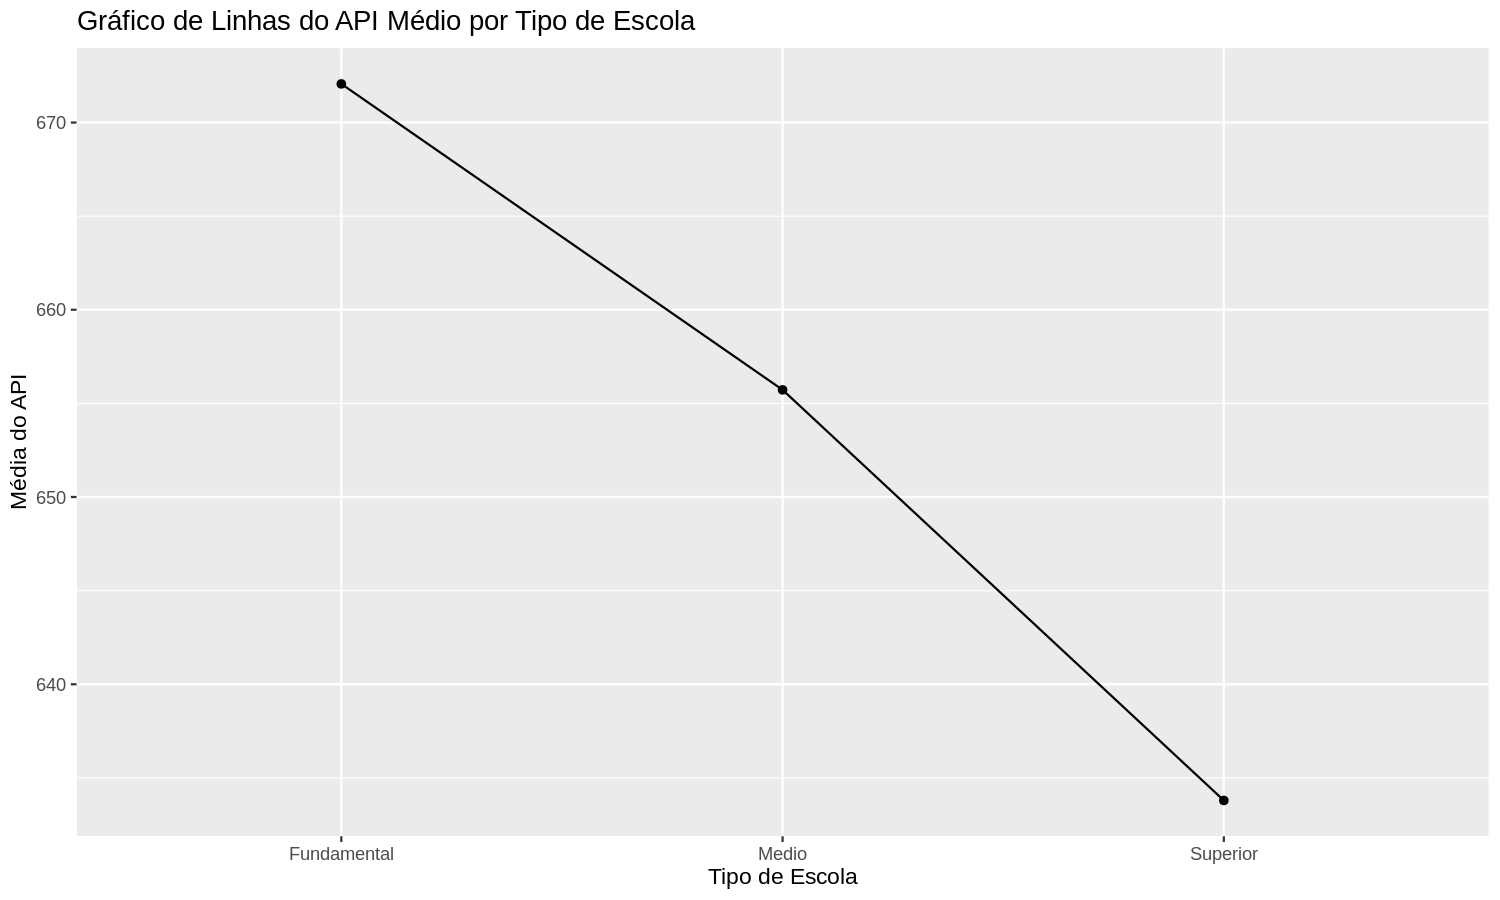

In [40]:
ggplot(mean_api_type, aes(x = TIPO, y = mean_api, group = 1)) +
  geom_line() +
  geom_point() +
  labs(title = "Gráfico de Linhas do API Médio por Tipo de Escola",
       x = "Tipo de Escola",
       y = "Média do API")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


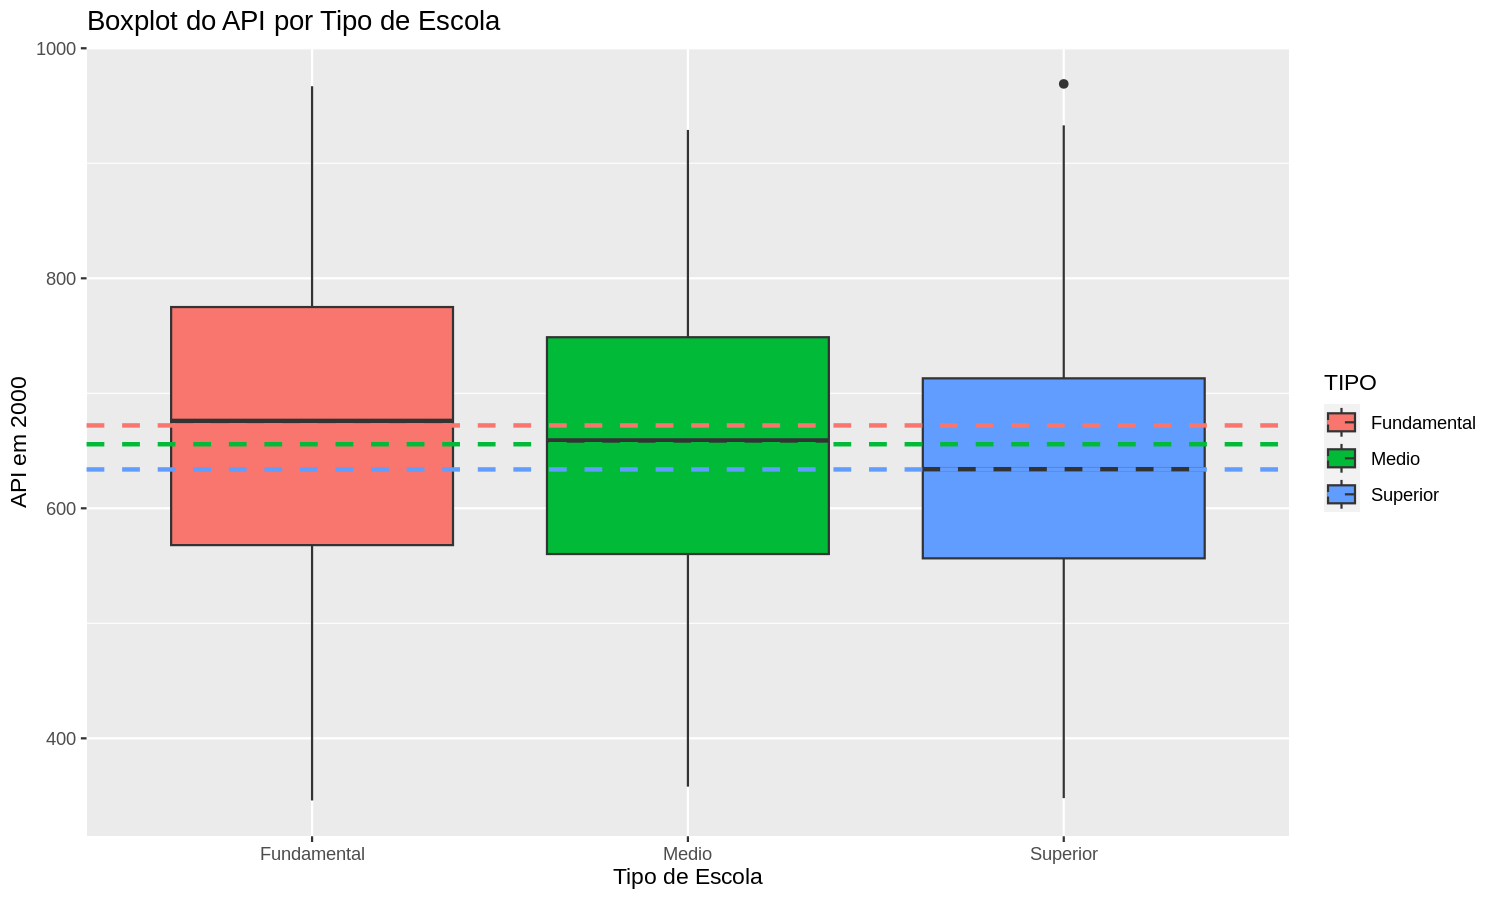

In [41]:
ggplot(df, aes(x = TIPO, y = API00, fill = TIPO)) +
  geom_boxplot() +
  geom_hline(data = mean_api_type, aes(yintercept = mean_api, color = TIPO),
             linetype = "dashed", size = 1) +
  labs(title = "Boxplot do API por Tipo de Escola",
       x = "Tipo de Escola", y = "API em 2000")

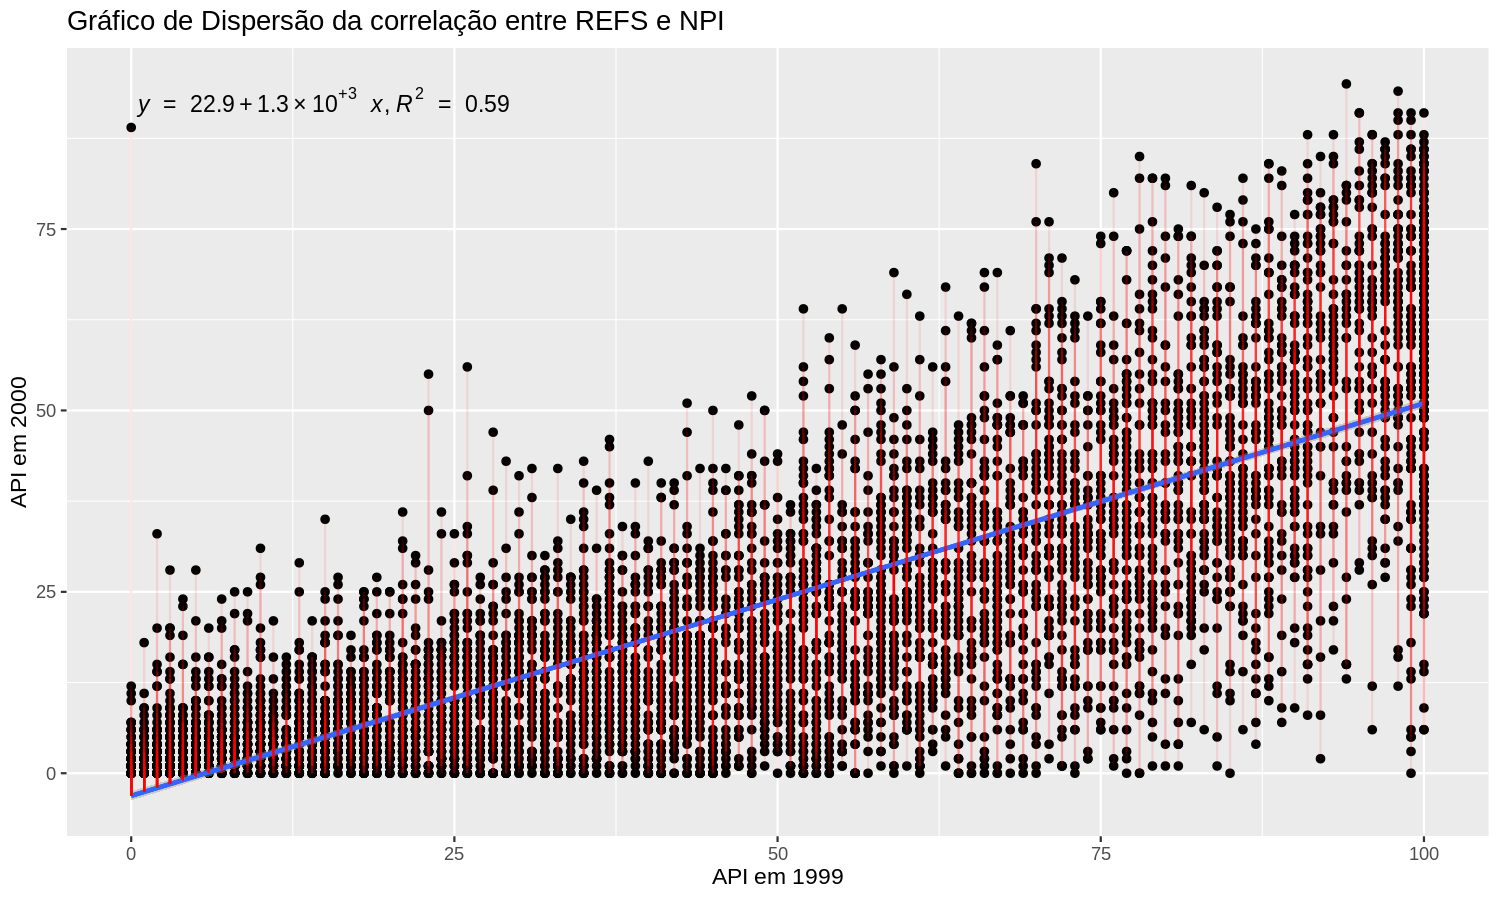

In [42]:
fm <- y ~ poly(x,1)
ggplot(df, aes(x = REFS, y = NPI)) +
  geom_point() +
  geom_smooth(formula = fm, method = "lm", se = FALSE, color = "blue") +
  stat_poly_line(formula = fm) +
  stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
  stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
  labs(title = "Gráfico de Dispersão da correlação entre REFS e NPI",
       x = "API em 1999", y = "API em 2000")

Warning message:
“The following aesthetics were dropped during statistical transformation: size
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


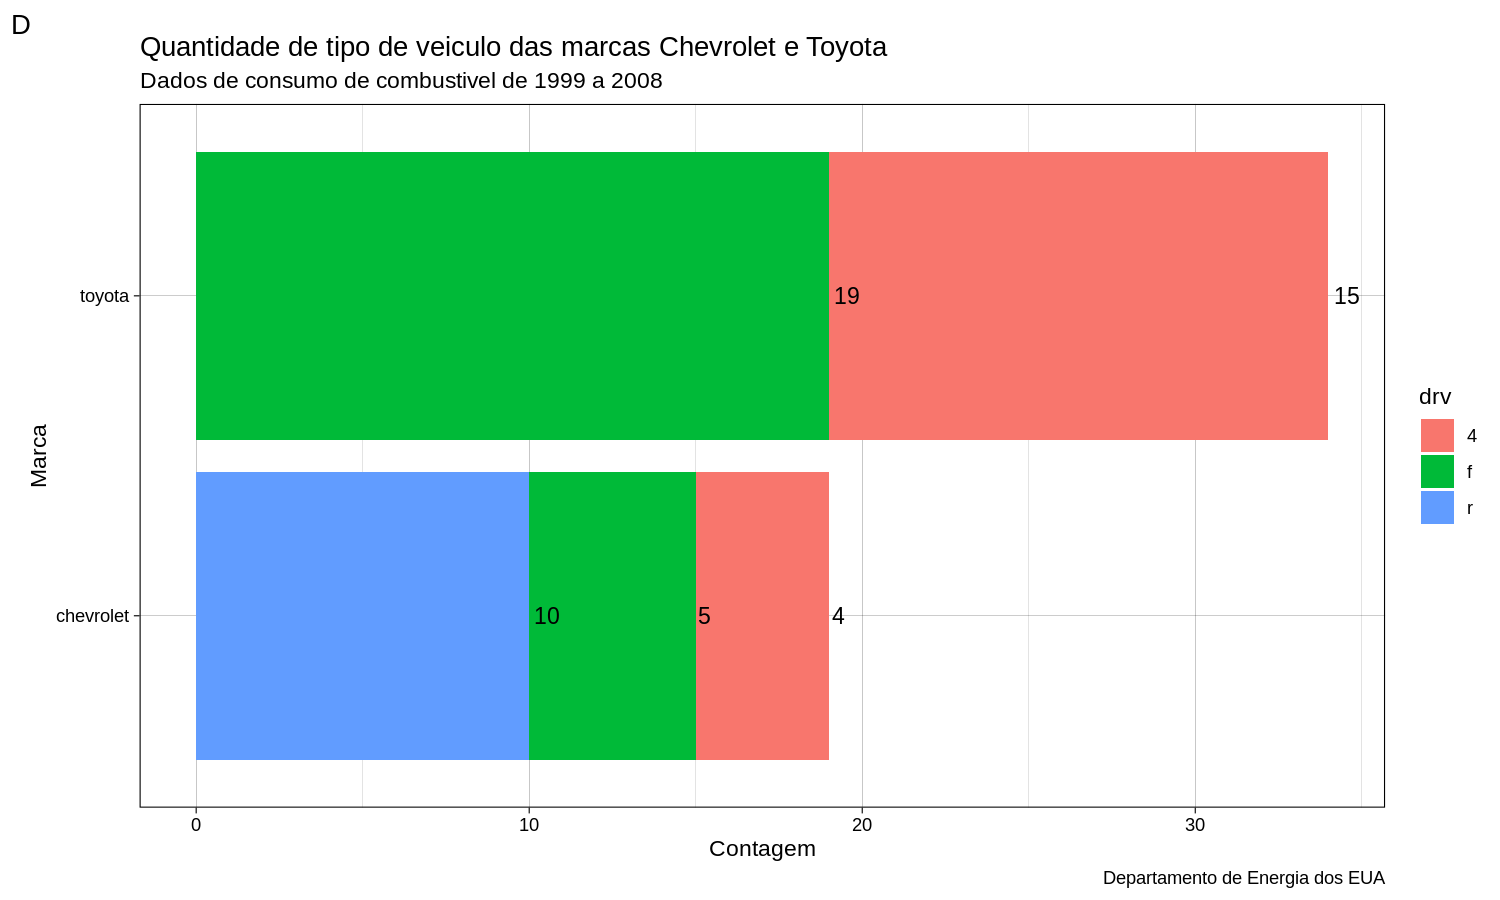

In [43]:
# Gráfico de barras horizontal com textos indicando as contagens e legenda horizontal
mpg %>%
  filter(manufacturer %in% c("chevrolet", "toyota")) %>%
  ggplot(data = ., aes(x = manufacturer, fill = drv)) +
  geom_bar() +
  geom_text(
    stat = "count",
    aes(label = after_stat(count), size = cyl),
    hjust = -0.2,
    vjust = 0.5,
    position = "stack"
  ) +
  coord_flip() +
  labs(
    title = "Quantidade de tipo de veiculo das marcas Chevrolet e Toyota",
    subtitle = "Dados de consumo de combustivel de 1999 a 2008",
    caption = "Departamento de Energia dos EUA",
    tag = "D",
    x = "Marca",
    y = "Contagem",
    color = "Tipo de Veículo"
  ) +
  theme_linedraw()

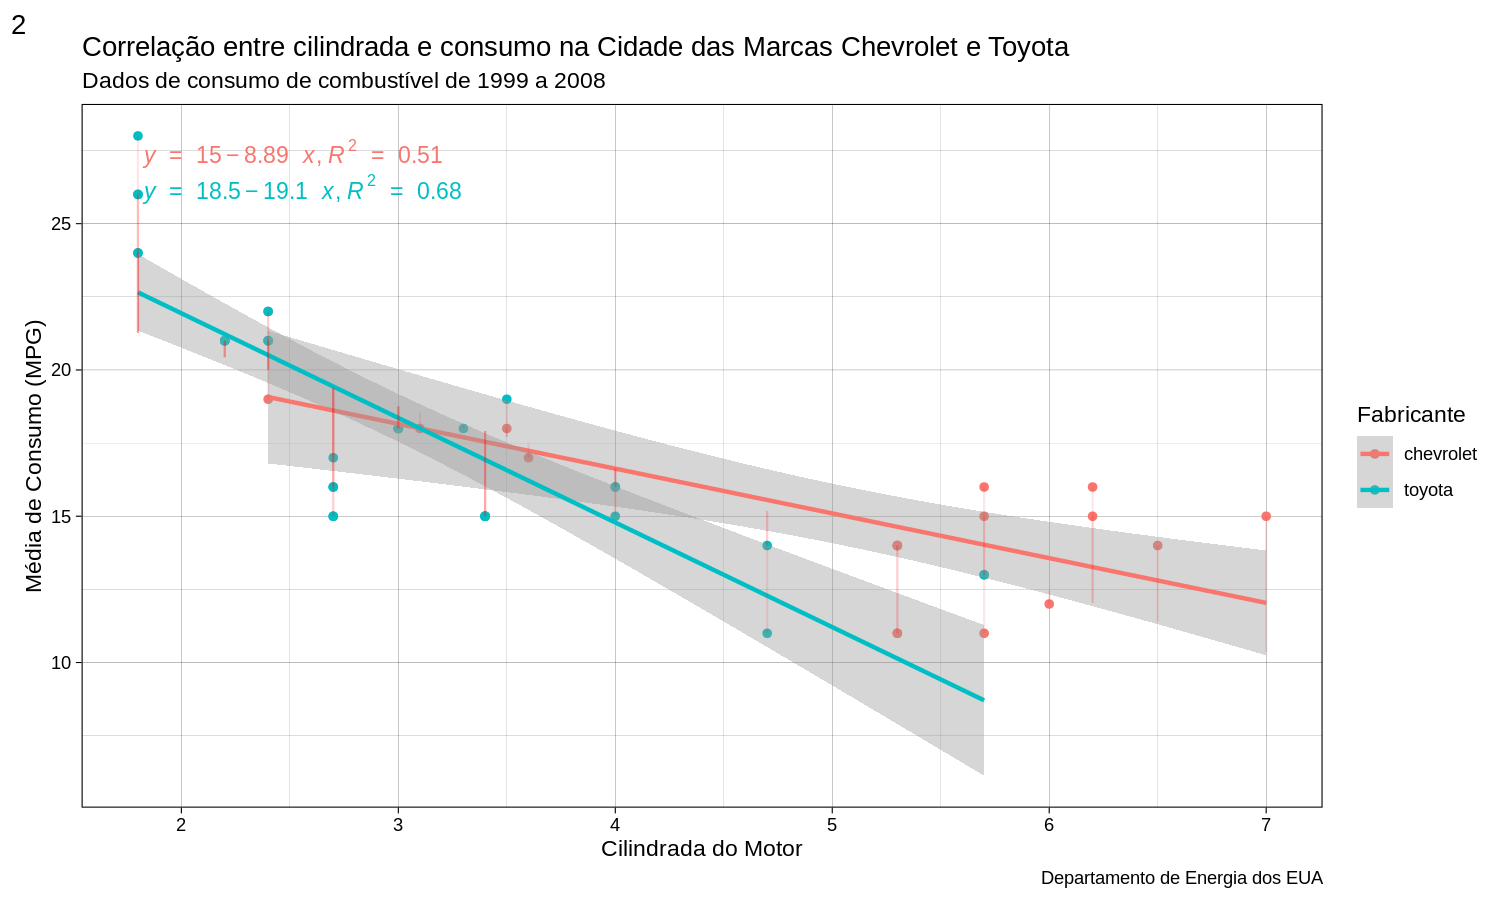

In [44]:
# Gráfico de dispersão com linha de regressão, respectiva equação e R2

fm <- y ~ poly(x,1)
mpg %>%
  filter(manufacturer %in% c("chevrolet", "toyota")) %>%
  ggplot(data = ., mapping = aes(x = displ, y = cty, color = manufacturer)) +
  geom_point() +
  ggpmisc::stat_poly_line(formula = fm) +
  ggpmisc::stat_poly_eq(formula = fm, use_label(c("eq","R2"))) +
  stat_fit_deviations(formula = fm, colour = "red", alpha = .1) +
  labs(
    title = "Correlação entre cilindrada e consumo na Cidade das Marcas Chevrolet e Toyota",
    subtitle = "Dados de consumo de combustível de 1999 a 2008",
    caption = "Departamento de Energia dos EUA",
    tag = "2",
    x = "Cilindrada do Motor",
    y = "Média de Consumo (MPG)",
    color = "Fabricante"
  ) +
  theme_linedraw()

In [45]:
# Dados Filtrados
dados_filtrados <- mpg %>%
  filter(class %in% c("compact", "subcompact"))

# Calculo da média do consumo na estrada (cty)
media_consumo <- mean(dados_filtrados$cty)

# Imprimir a média
print(media_consumo)

[1] 20.23171


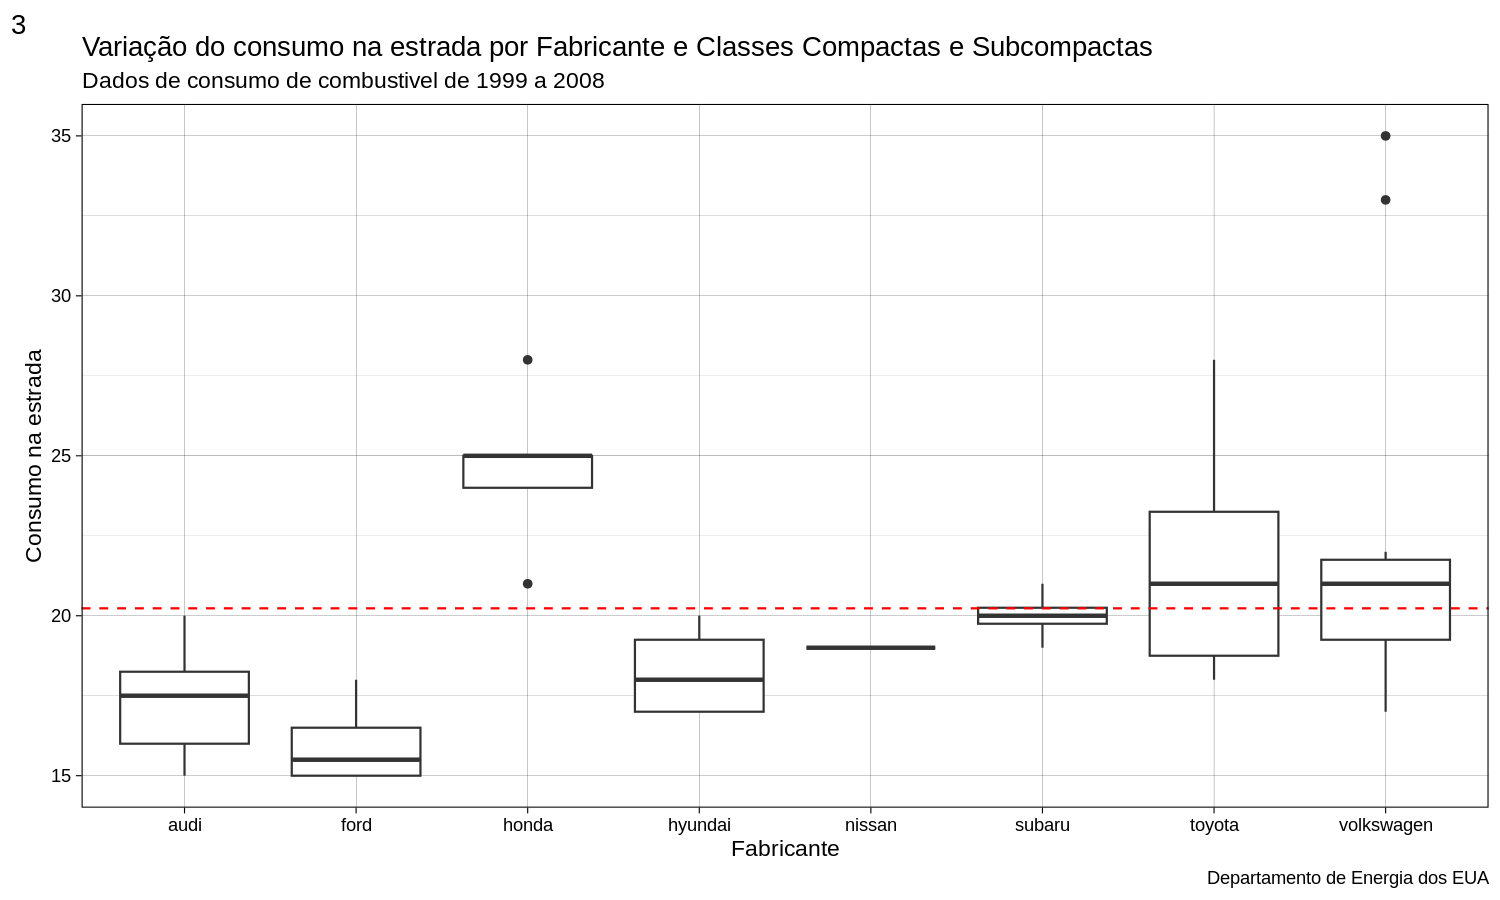

In [46]:
# Gráfico de caixa (boxplot) com linha horizontal representando a média geral;
mpg %>%
  filter(class == c("compact","subcompact")) %>%
  ggplot(aes(x = manufacturer, y = cty))+
  geom_boxplot() +
  geom_hline(yintercept = 20.23171, color = "red", linetype = "dashed") +
  labs(
      title= "Variação do consumo na estrada por Fabricante e Classes Compactas e Subcompactas",
      subtitle="Dados de consumo de combustivel de 1999 a 2008",
      caption="Departamento de Energia dos EUA",
      tag = "3",
      x = "Fabricante",
      y = "Consumo na estrada"
      )+
      theme_linedraw()

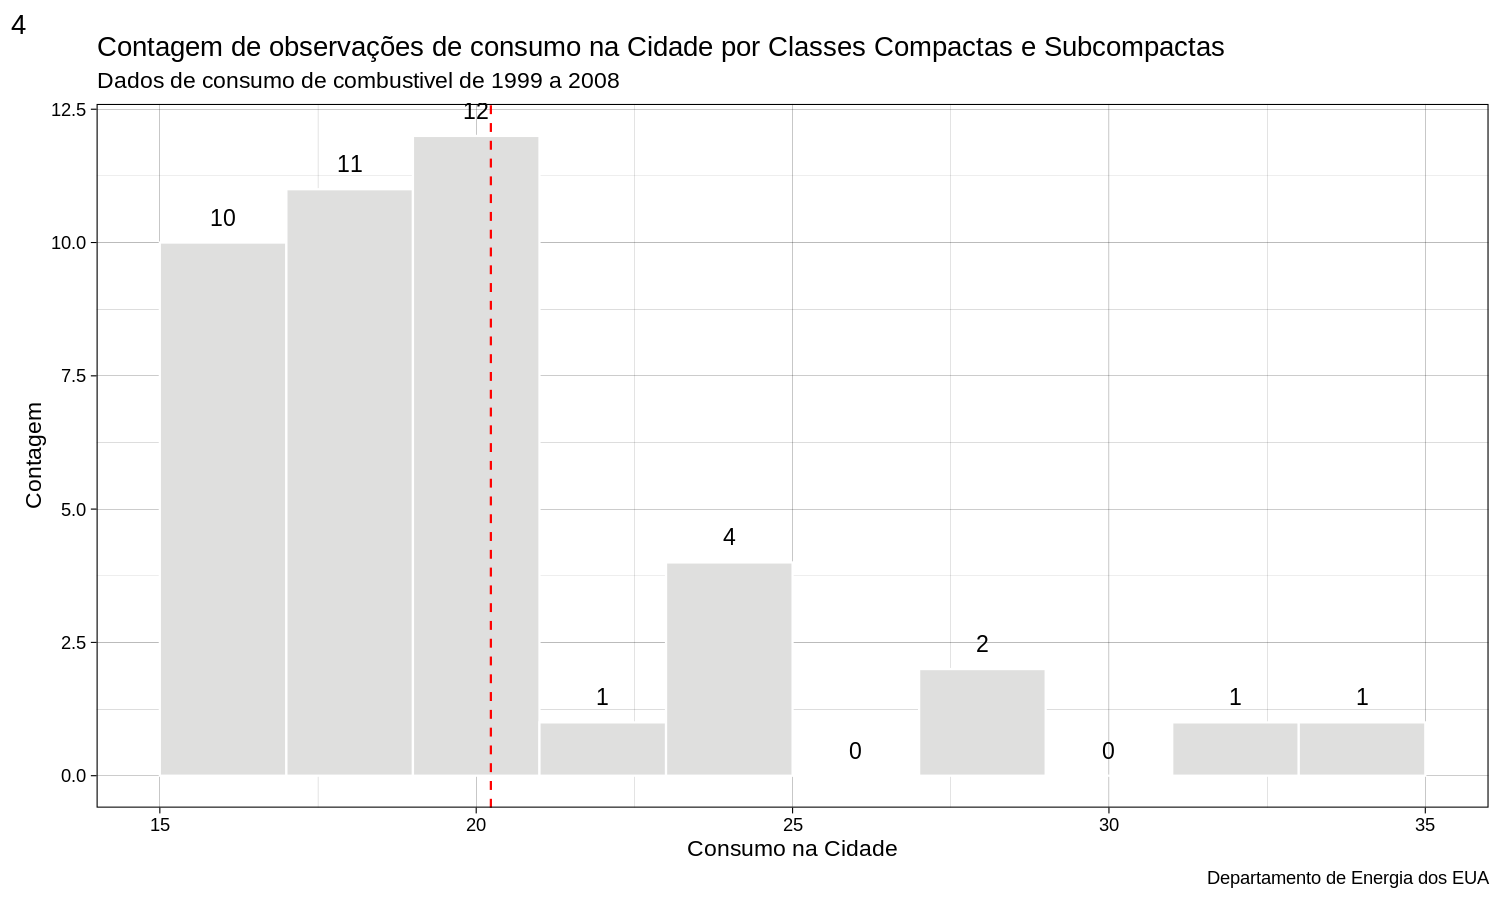

In [47]:
# Histograma com linha vertical representando a média geral
mpg %>%
  filter(class == c("compact","subcompact")) %>%
  ggplot(aes(x = cty))+
      # geom_histogram(bins = 15)
      geom_histogram(binwidth = 2, fill = "#dfdfde", colour = "#FFFFFF")+
      geom_vline(xintercept = 20.23171, color = "red", linetype = "dashed")+
      theme_linedraw()+
      stat_bin(binwidth = 2,
      geom = "text",
      aes(label = after_stat(count)),
      vjust = -1) +
      labs(
      title= "Contagem de observações de consumo na Cidade por Classes Compactas e Subcompactas",
      subtitle="Dados de consumo de combustivel de 1999 a 2008",
      caption="Departamento de Energia dos EUA",
      tag = "4",
      x = "Consumo na Cidade",
      y = "Contagem"
      )+
      theme_linedraw()